In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing dataset
df1=pd.read_csv("student-data.csv")

In [3]:
## to see all the columns without any truncations
pd.set_option('display.max_columns', None)
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [4]:
df1.shape

(395, 31)

###### There are 395 rows and 31 columns in the dataset.

In [5]:
## checking the dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
## gender distribution 
df1['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

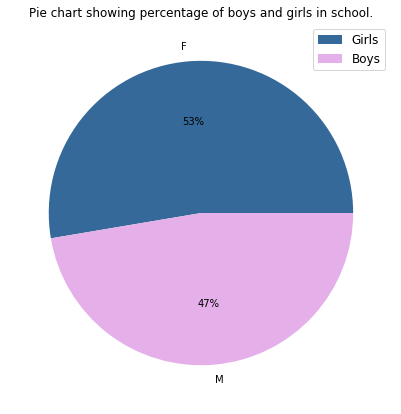

In [7]:
plt.figure(figsize=(7,7))
plt.title("Pie chart showing percentage of boys and girls in school.")
colors = ['#34699A','#E5B0EA']
plt.pie(df1['sex'].value_counts(), labels = df1['sex'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(['Girls','Boys'],loc="upper right",fontsize='large')
plt.show()

In [8]:
## Total students passed and failed
df1['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [9]:
print("The graduation rate is : ",round((265/395)*100,2),"%")

The graduation rate is :  67.09 %


In [10]:
## to set the size of plt parameters
plt.rcParams['font.size'] = 11

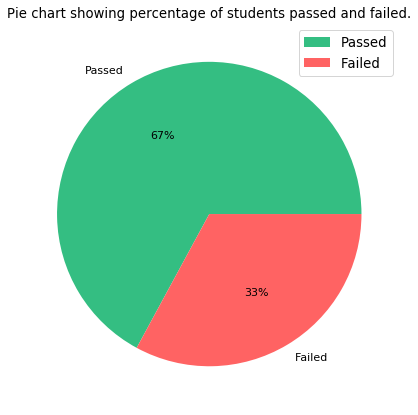

In [11]:
## Total students pass and failed
plt.figure(figsize=(7,7))
plt.title("Pie chart showing percentage of students passed and failed.")
colors = ['#34BE82','#FF6363']
plt.pie(df1['passed'].value_counts(), labels = ['Passed','Failed'], colors = colors, autopct='%.0f%%')
plt.legend(['Passed','Failed'],loc="upper right",fontsize='large')
plt.show()

Text(0.5, 0, 'Gender')

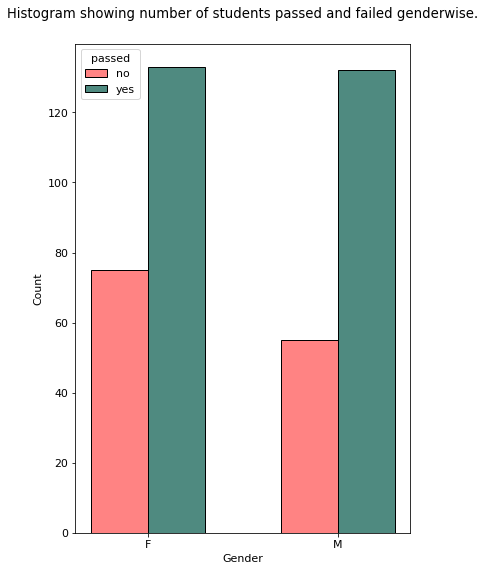

In [12]:
## gender vs pass/failed
plt.figure(figsize=(6,9))
plt.title("Histogram showing number of students passed and failed genderwise.",y=1.04)
sns.histplot(data=df1, x="sex", hue="passed",multiple="dodge",shrink=.6,palette=['#FF5959','#146356'])
plt.xlabel('Gender')

Text(0.5, 0, 'Gender')

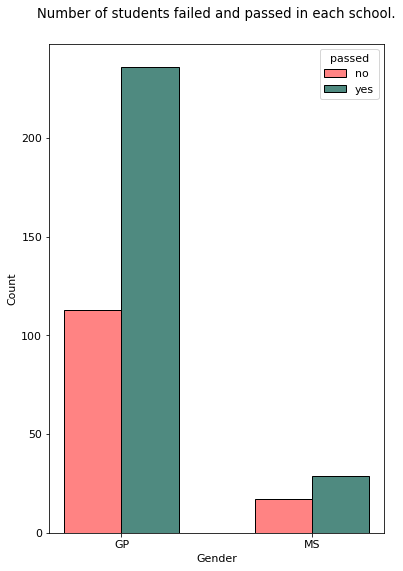

In [13]:
## school vs pass/failed
plt.figure(figsize=(6,9))
plt.title("Number of students failed and passed in each school.",y=1.04)
sns.histplot(data=df1, x="school", hue="passed",multiple="dodge",shrink=.6,palette=['#FF5959','#146356'])
plt.xlabel('Gender')

C:\Users\MyPc\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


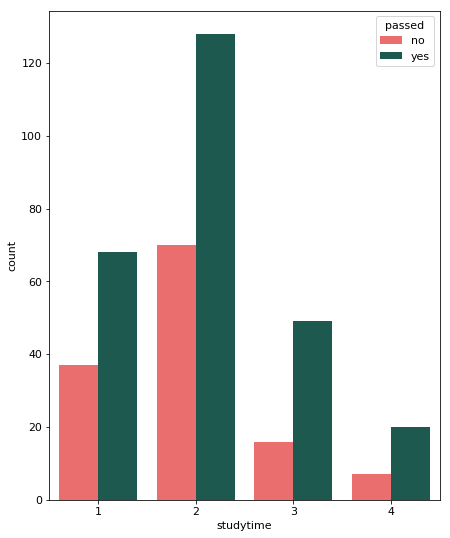

In [14]:
## Study time vs Passed/failed
plt.figure(figsize=(7,9))
sns.countplot(df1['studytime'],hue=df1['passed'],palette=['#FF5959','#146356'])

Majority of the students who passed the test had two hours of study time.

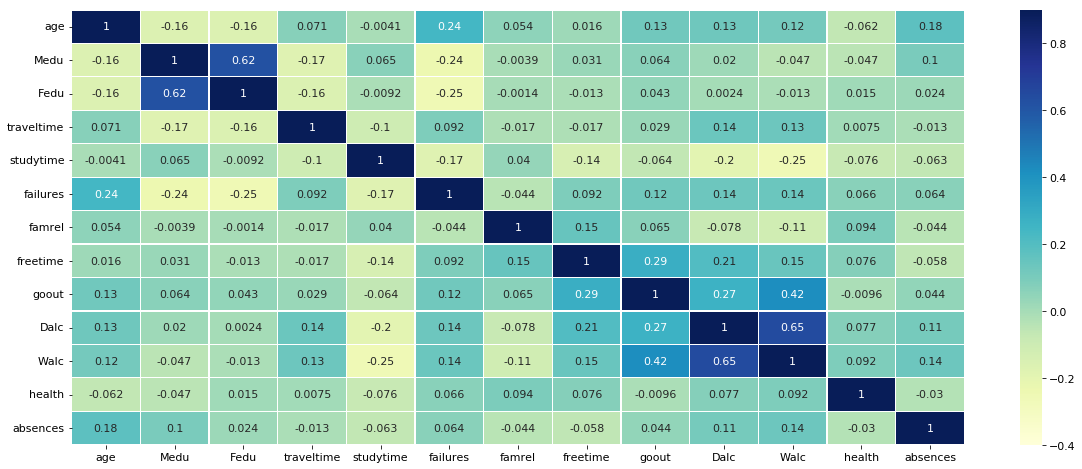

In [15]:
## corr matrix
corr=df1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [16]:
## Checking for NULL values
df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

<b> No NULL values in the dataset</b>

In [17]:
## dividing data into dependent and independent features.
x=df1.drop('passed',axis=1)
y=df1['passed']

In [18]:
## convert all categorical to numerical using one hot encoding
x=pd.get_dummies(x)

In [19]:
## after one hot encoding the number of columns changed
x.shape

(395, 56)

In [20]:
## splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.24)

### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
y_pred[0:5]

array(['no', 'no', 'no', 'yes', 'no'], dtype=object)

In [23]:
y_test[0:5]

78     yes
371    yes
248     no
55     yes
390     no
Name: passed, dtype: object

In [24]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.7157894736842105

In [25]:
f1_score(y_test,y_pred,pos_label='yes')

0.7999999999999999

In [26]:
temp=[]
temp.append(['Logistic Regression',round(accuracy_score(y_test,y_pred),5)])

### 2. KNN

Text(0, 0.5, 'accuracy')

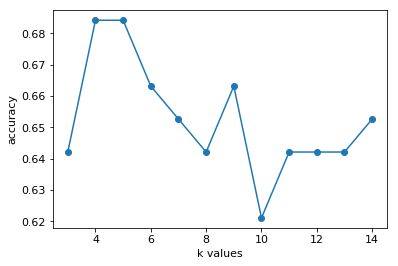

In [27]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")

In [28]:
## k=4
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.6842105263157895

In [30]:
f1_score(y_test,y_pred,pos_label='yes')

0.7692307692307692

In [31]:
temp.append(['KNN',round(accuracy_score(y_test,y_pred),5)])

### 3. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
accuracy_score(y_test,y_pred)

0.631578947368421

In [34]:
f1_score(y_test,y_pred,pos_label='yes')

0.7328244274809161

In [35]:
temp.append(['Random Forest',round(accuracy_score(y_test,y_pred),5)])

### 4. Gradient Booster 

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.6842105263157895

In [38]:
f1_score(y_test,y_pred,pos_label='yes')

0.7794117647058824

In [39]:
temp.append(['Gradient Booster',round(accuracy_score(y_test,y_pred),5)])

### 5. Extreme Gradient Booster

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6526315789473685

In [42]:
f1_score(y_test,y_pred,pos_label='yes')

0.7591240875912408

In [43]:
temp.append(['Extreme Gradient Booster',round(accuracy_score(y_test,y_pred),5)])

### 6. SVM

In [44]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.6947368421052632

In [46]:
f1_score(y_test,y_pred,pos_label='yes')

0.7819548872180451

In [47]:
temp.append(['Linear SVM',round(accuracy_score(y_test,y_pred),5)])

In [48]:
## poly SVM
svm_linear=SVC(kernel='poly',degree=2)
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
accuracy_score(y_test,y_pred)

0.6842105263157895

In [50]:
f1_score(y_test,y_pred,pos_label='yes')

0.7857142857142857

In [51]:
temp.append(['Poly SVM',round(accuracy_score(y_test,y_pred),5)])

In [52]:
## radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
accuracy_score(y_test,y_pred)

0.6526315789473685

In [54]:
f1_score(y_test,y_pred,pos_label='yes')

0.778523489932886

In [55]:
temp.append(['Radial SVM',round(accuracy_score(y_test,y_pred),5)])

In [56]:
## converting all accuracy sc to a dataframe
df2 = pd.DataFrame(temp, columns = ['Algorithms', 'Accuracy_score'])

In [57]:
df2.sort_values(by=['Accuracy_score'],ascending=False)

,Algorithms,Accuracy_score
0,Logistic Regression,0.71579
5,Linear SVM,0.69474
1,KNN,0.68421
3,Gradient Booster,0.68421
6,Poly SVM,0.68421
4,Extreme Gradient Booster,0.65263
7,Radial SVM,0.65263
2,Random Forest,0.63158


<b>Logistic Regression is the best model with accuracy_score of 71%</b>